In [18]:
#pip install lenstronomy



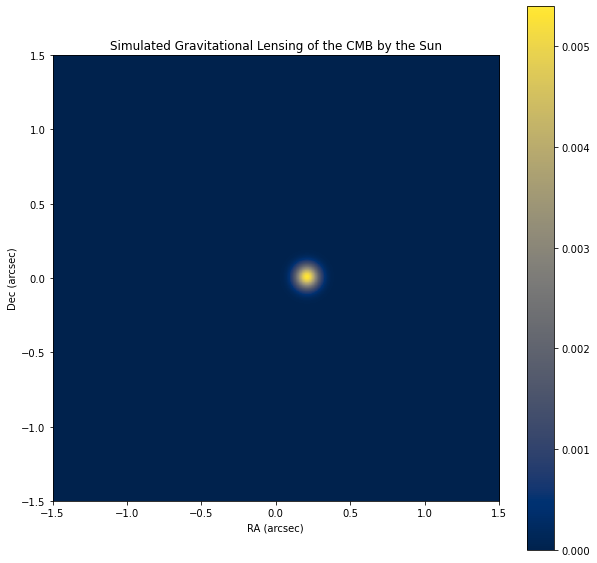

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LightModel.light_model import LightModel
from lenstronomy.Data.pixel_grid import PixelGrid
from lenstronomy.Data.psf import PSF
from lenstronomy.ImSim.image_model import ImageModel

# Constants
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2
c = 3e8  # Speed of light, m/s
M_sun = 1.989e30  # Solar mass, kg
D_lens = 1.5e11  # Distance from observer to lens (Sun), m
D_source = 1.4e10 * 3.26 * 9.461e15  # Approx. distance to CMB, m

# Lens properties
theta_E = np.sqrt(4 * G * M_sun / (c ** 2) * (1 / D_lens - 1 / D_source))  # Einstein radius
lens_model_list = ['SPEP']
lensModel = LensModel(lens_model_list)

kwargs_spep = {'theta_E': theta_E, 'e1': 0, 'e2': 0,'gamma': 2 ,'center_x': 0, 'center_y': 0}
kwargs_lens = [kwargs_spep]

# Light properties (CMB)
light_model_list = ['GAUSSIAN']
lightModel = LightModel(light_model_list)

kwargs_cmb = {'amp': 1, 'sigma': 0.05, 'center_x': 0.2, 'center_y': 0}
kwargs_light = [kwargs_cmb]

# Pixel grid and PSF
delta_pix = 0.01  # size of pixel in angular coordinates
num_pix = 300  # number of pixels (square)

ra_at_xy_0, dec_at_xy_0 = -delta_pix * num_pix / 2, -delta_pix * num_pix / 2
transform_pix2angle = np.array([[1, 0], [0, 1]]) * np.array([[delta_pix, 0], [0, delta_pix]])

pixel_grid = PixelGrid(num_pix,num_pix,transform_pix2angle, ra_at_xy_0, dec_at_xy_0)


psf_fwhm = 0.05  # FWHM of PSF
psf = PSF(psf_type='GAUSSIAN', fwhm=psf_fwhm)

# Image model
image_model = ImageModel(pixel_grid, psf, lensModel, lightModel)

# Simulate lensed CMB image
image = image_model.image(kwargs_lens, kwargs_light)

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='cividis', origin='lower', extent=[ra_at_xy_0, -ra_at_xy_0, dec_at_xy_0, -dec_at_xy_0])
plt.colorbar()
plt.xlabel('RA (arcsec)')
plt.ylabel('Dec (arcsec)')
plt.title('Simulated Gravitational Lensing of the CMB by the Sun')
plt.show()

